# Simple Linear Regression (TP - Link Price Prediction)

## Explanation

### Objective

Create a machine learning model that can predict a TP - Link Price, using Simple Linear Regression algorithm.

### Column Descriptions

- ***Date*** = Waktu Pengambilan Data
- ***Last*** = Crawling Waktu Update Data
- ***SKU*** = Name ID Produk
- ***Product Name*** = Nama Produk (Title) yang tertera di Ecommerce
- ***URL Product*** = URL produk di ECommerce
- ***Seller*** = Nama Toko
- ***Merchant*** = Nama E Commerce
- ***Stock*** = Status Ketersediaan barang
- ***Item*** = Condition Baru / Bekas
- ***Filter*** = Apakah Harga diatas bottom price ?
- ***Flag*** = Keterangan Tambahan
- ***Bottom Price*** = Harga Grosir (Beli dari Pabrik)
- ***Original Price*** = Harga yang di set oleh toko di awal penjualan
- ***Discount*** = Besaran diskon yang diberikan
- ***Selling Price*** = Harga Penjualan setelah diberikan diskon
- ***Discrepancy*** = Perbedaan harga
- ***Sales Quantity*** = Jumlah barang terjual
- ***Sales Revenue*** = Jumlah pendapatan dari barang terjual

## A. Data Preparation

### A.1 Import Libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [60]:
try:
    df = pd.read_excel('TPlink_price.xlsx')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Viewing Data Dimensions

In [61]:
df.shape

(32772, 18)

### A.4 Viewing Data Informations

In [62]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 32772 entries, 0 to 32771
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32772 non-null  datetime64[us]
 1   Last Crawling   32772 non-null  datetime64[us]
 2   SKU Name        32772 non-null  str           
 3   Product Name    32772 non-null  str           
 4   Url Product     32772 non-null  str           
 5   Seller          32772 non-null  object        
 6   Merchant        32772 non-null  str           
 7   Stock           32772 non-null  str           
 8   Item Condition  32772 non-null  str           
 9   Filter          32772 non-null  str           
 10  Flag            32772 non-null  str           
 11  Bottom Price    32772 non-null  int64         
 12  Original Price  32772 non-null  object        
 13  Discount        32772 non-null  object        
 14  Selling Price   32772 non-null  int64         
 15  Discrepancy  

### A.5 Viewing Data Statistics

In [63]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='flare')

,count,mean,min,25%,50%,75%,max,std
Date,32772.00,.2f,.2f,.2f,.2f,.2f,.2f,nan
Last Crawling,32772.00,.2f,.2f,.2f,.2f,.2f,.2f,nan
Bottom Price,32772.00,155000.00,155000.00,155000.00,155000.00,155000.00,155000.00,0.00
Selling Price,32772.00,268262.42,25000.00,214000.00,242000.00,287000.00,55500000.00,385799.00
Discrepancy,32772.00,0.02,0.00,0.01,0.02,0.02,3.58,0.02
Sales Quantity,32772.00,13.31,0.00,0.00,0.00,0.00,33740.00,353.21
Sales Revenue,32772.00,2082037.32,0.00,0.00,0.00,0.00,5229700000.00,54823025.20


### A.6 Viewing Top 5 Data and Bottom 5 Data

In [64]:
df.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,2022-10-22,2022-10-22,TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,2022-10-22,2022-10-22,TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,2022-10-22,2022-10-22,TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,2022-10-22,2022-10-22,TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,2022-10-22,2022-10-22,TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [65]:
df.tail()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
32767,2022-09-20,2022-09-20,TL WR840N,KODE CVUSM02 TP-LINK TL-WR840N 300MBps Wireles...,https://tokopedia.com/cvunggulsidomukti/kode-c...,CV Unggul Sido Mukti,tokopedia,In Stock,baru,Above,Please Check,155000,244000,0,244000,0.015742,0,0
32768,2022-09-20,2022-09-20,TL WR840N,WIRELESS ROUTER TP-LINK TL-WR840N 300Mbps,https://tokopedia.com/carlton279/wireless-rout...,carlton279,tokopedia,In Stock,baru,Above,Please Check,155000,212000,0,212000,0.013677,0,0
32769,2022-09-20,2022-09-20,TL WR840N,TP-LINK TL-WR840N 300Mbps Wireless Router / Wi...,https://tokopedia.com/forgotenstore/tp-link-tl...,Forgoten Store,tokopedia,In Stock,baru,Above,Please Check,155000,271733,0,271733,0.017531,0,0
32770,2022-09-20,2022-09-20,TL WR840N,WIRELESS ROUTER TP-LINK TL-WR840N 300Mbps,https://tokopedia.com/sani1/wireless-router-tp...,Sani1_Shop,tokopedia,In Stock,baru,Above,Please Check,155000,210000,0,210000,0.013548,0,0
32771,2022-09-20,2022-09-20,TL WR840N,Router Tp-Link Wifi Wireless 300Mbps - Tl-Wr840N,https://tokopedia.com/plum-stores/router-tp-li...,PLUM store&#39;s,tokopedia,In Stock,baru,Above,Please Check,155000,274900,0,274900,0.017735,0,0


### A.7 Viewing Duplicated Data

In [66]:
df.duplicated().sum()

np.int64(0)

### A.8 Viewing Missing Data

In [67]:
df.isna().sum()

Date              0
Last Crawling     0
SKU Name          0
Product Name      0
Url Product       0
Seller            0
Merchant          0
Stock             0
Item Condition    0
Filter            0
Flag              0
Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

### A.9 Viewing Outlier Data

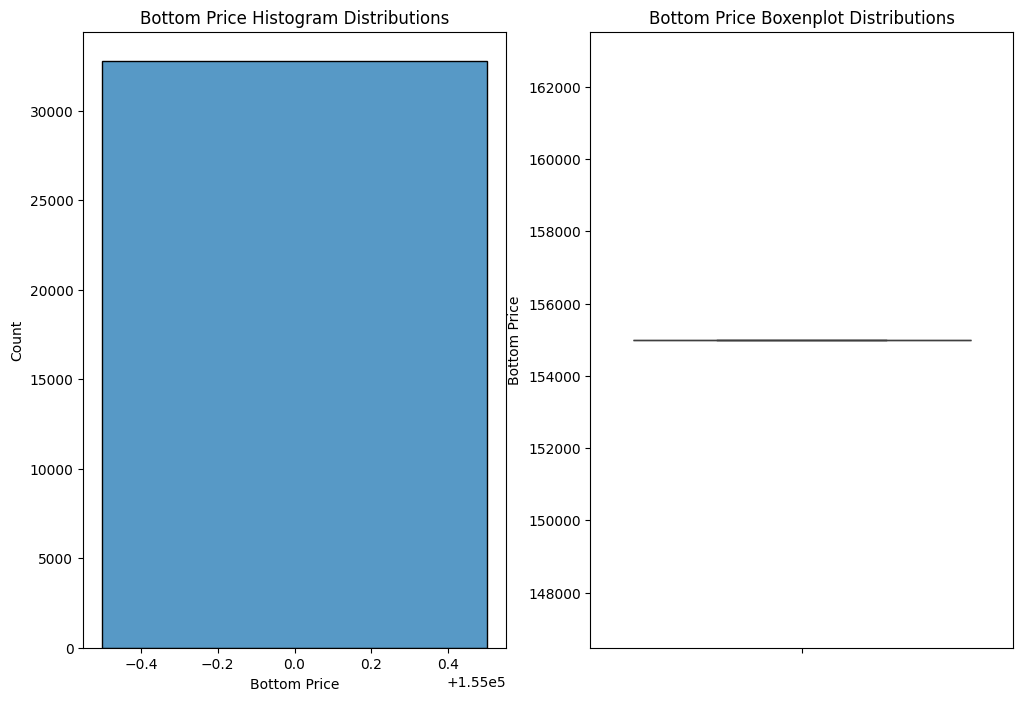

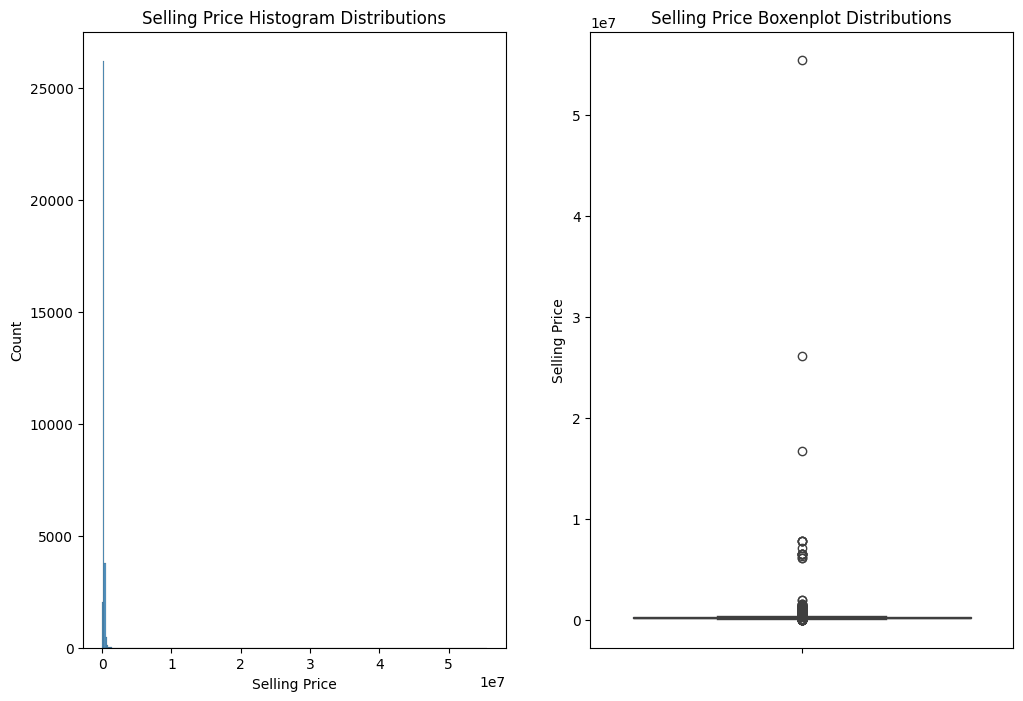

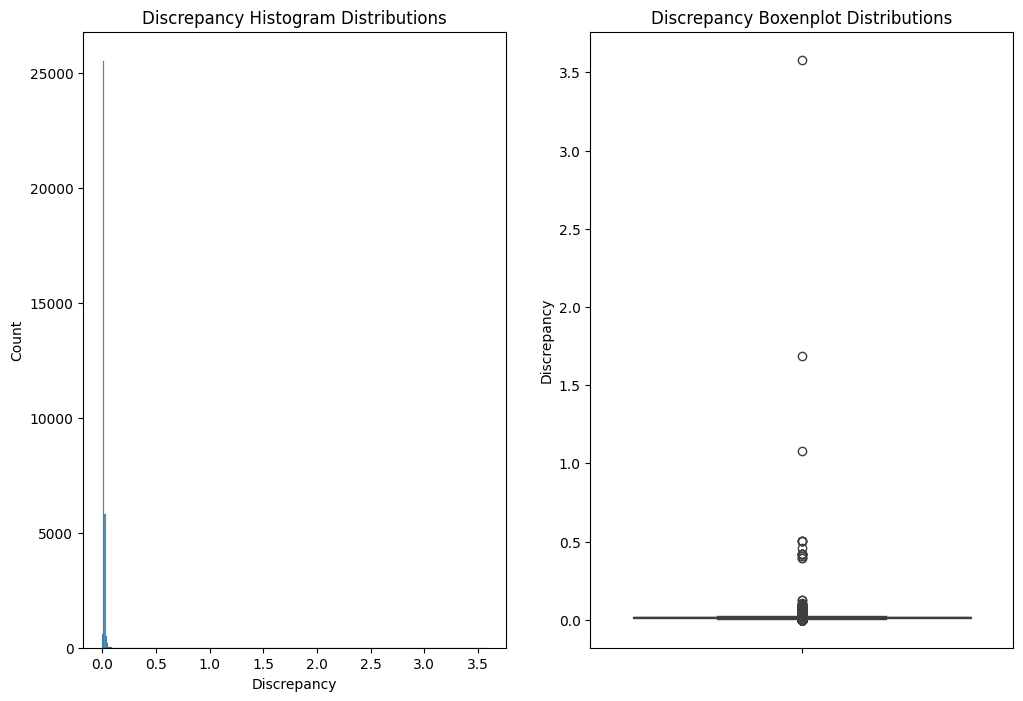

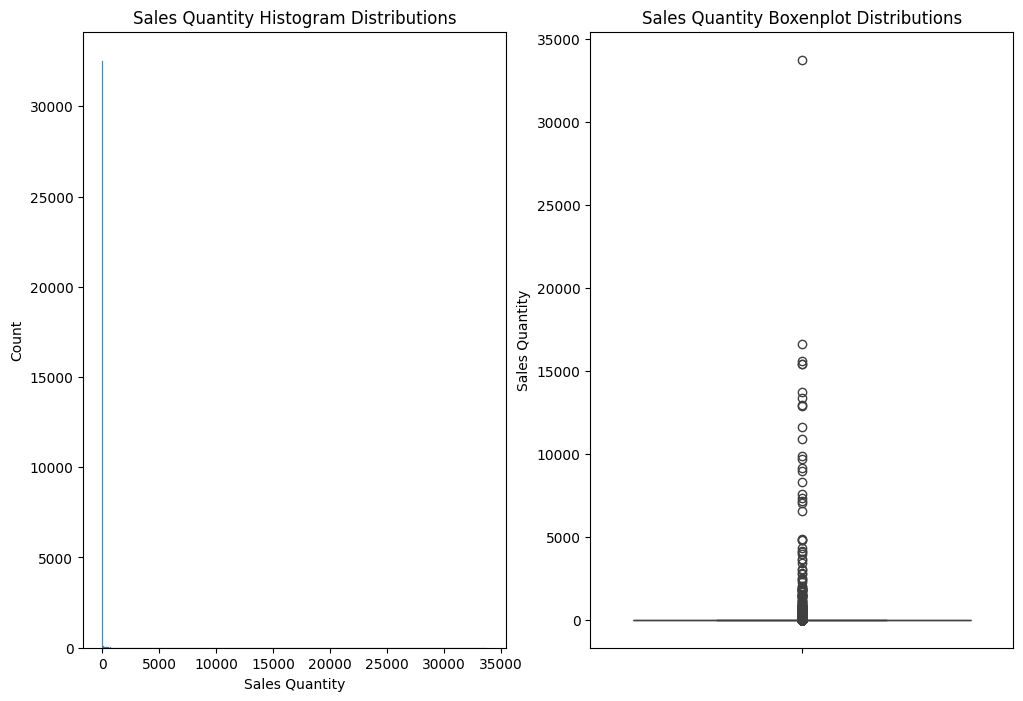

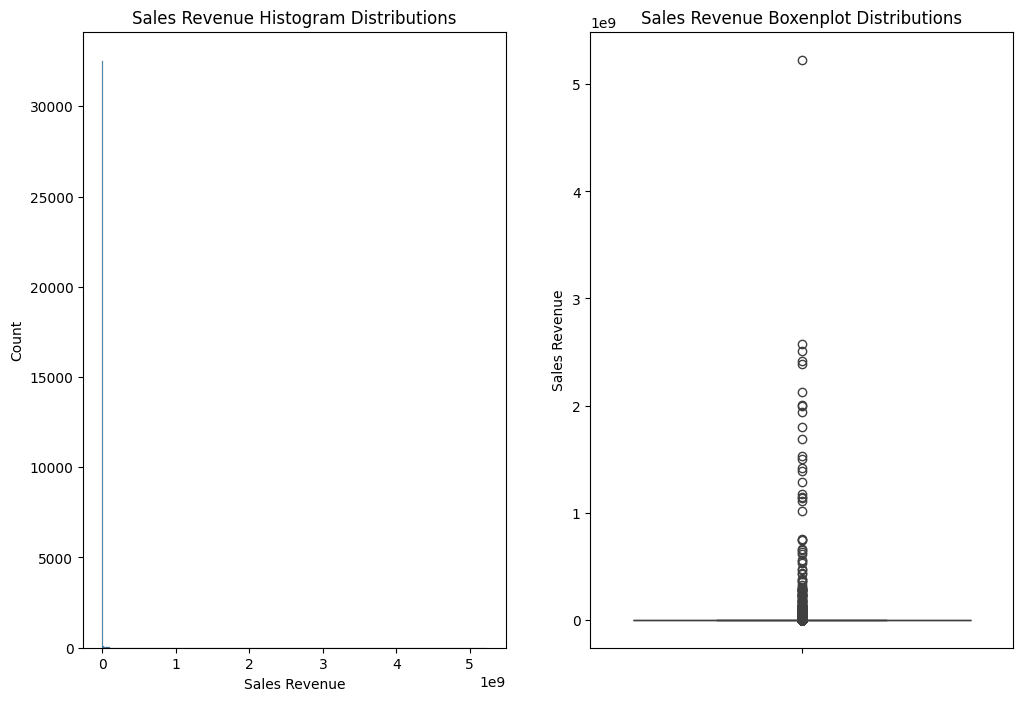

In [68]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 8))

    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f"{col} Histogram Distributions")

    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"{col} Boxenplot Distributions")

    plt.show()


## B. Data Preprocessing

### B.1 Handling Outliers

In [69]:
num = df.select_dtypes(include=['number']).columns

for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if IQR > 0:
        low_b = Q1 - 1.5 * IQR
        up_b = Q3 + 1.5 * IQR

        df = df[(df[col] >= low_b) & (df[col] <= up_b)]

In [70]:
df.shape

(30025, 18)

### B.2 Feature Engineering

#### Adding New Column

Week

In [71]:
df['Week'] = df['Date'].dt.day_of_week

### B.3 Finding Best Feature for Modelling

In [72]:
df = df.drop(columns=['Bottom Price'], errors='ignore')

In [114]:
df.corr(numeric_only=True).style.format("{:.2f}").background_gradient(cmap='flare')

,Selling Price,Discrepancy,Sales Quantity,Sales Revenue,Week
Selling Price,1.00,1.00,-0.05,-0.05,-0.02
Discrepancy,1.00,1.00,-0.05,-0.05,-0.02
Sales Quantity,-0.05,-0.05,1.00,1.00,0.00
Sales Revenue,-0.05,-0.05,1.00,1.00,0.00
Week,-0.02,-0.02,0.00,0.00,1.00


In [74]:
df_clean = df[['Discrepancy', 'Selling Price']]

In [75]:
df_clean.head()

,Discrepancy,Selling Price
0,0.014903,231000
1,0.014116,218800
2,0.014645,227000
3,0.016968,263000
4,0.015226,236000


## C. Exploratory Data Analysis

### C.1 Univariate Analysis

#### Features & Target Column Distributions

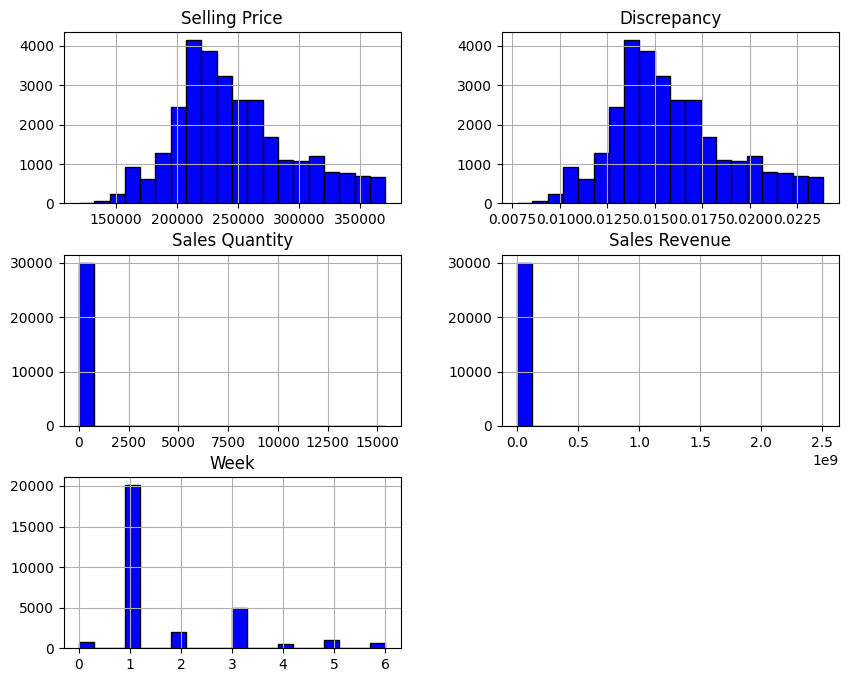

In [76]:
num_cols = df.select_dtypes(include='number')
num_cols.hist(bins=20, color='blue', edgecolor='black', figsize=(10, 8))
plt.title("Features & Target Distributions")
plt.show()

#### Main Features & Target Column Distributions

Text(0.5, 0, 'Selling Price')

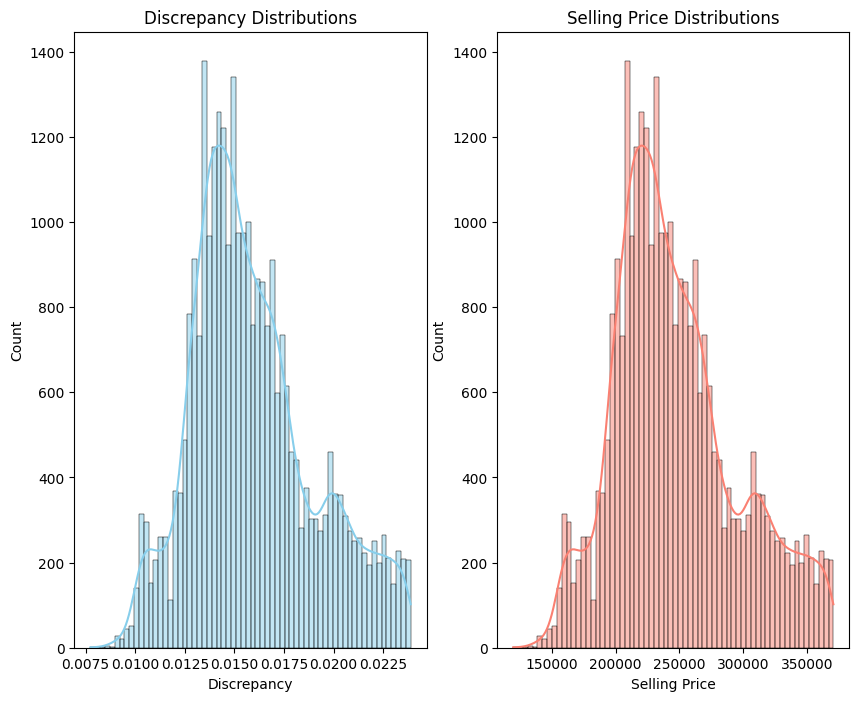

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

sns.histplot(df['Discrepancy'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Discrepancy Distributions")
axes[0].set_xlabel("Discrepancy")

sns.histplot(df['Selling Price'], kde=True, color='salmon', ax=axes[1])
axes[1].set_title("Selling Price Distributions")
axes[1].set_xlabel("Selling Price")

Text(0.5, 0, 'Selling Price')

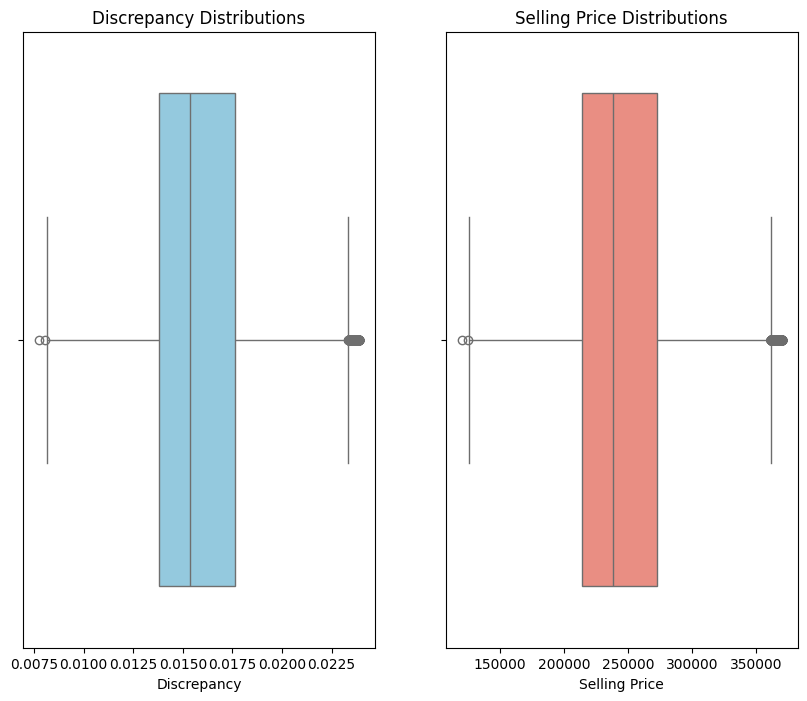

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

sns.boxplot(x=df['Discrepancy'], color='skyblue', ax=axes[0])
axes[0].set_title("Discrepancy Distributions")
axes[0].set_xlabel("Discrepancy")

sns.boxplot(x=df['Selling Price'], color='salmon', ax=axes[1])
axes[1].set_title("Selling Price Distributions")
axes[1].set_xlabel("Selling Price")

#### Product Stocks

Text(0.5, 1.0, 'Product Stocks')

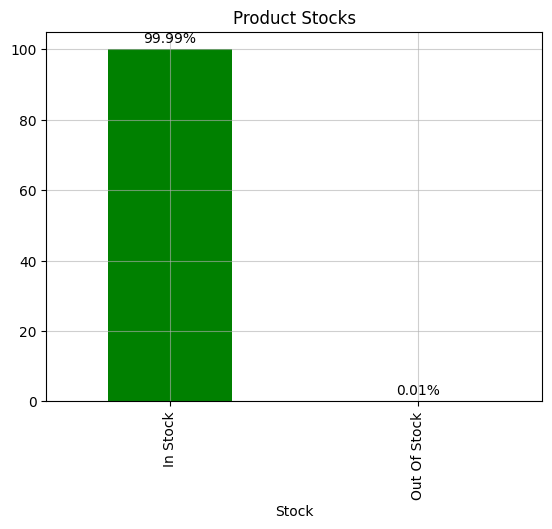

In [79]:
ax = df['Stock'].value_counts(normalize=True).mul(100).plot(kind='bar', color=['green', 'red'])
ax.bar_label(ax.containers[0], fmt='%.2f%%', padding=3)
ax.grid(True, alpha=0.6)
ax.set_title("Product Stocks")

#### Product Merchants

Text(0.5, 1.0, 'Product Merchants')

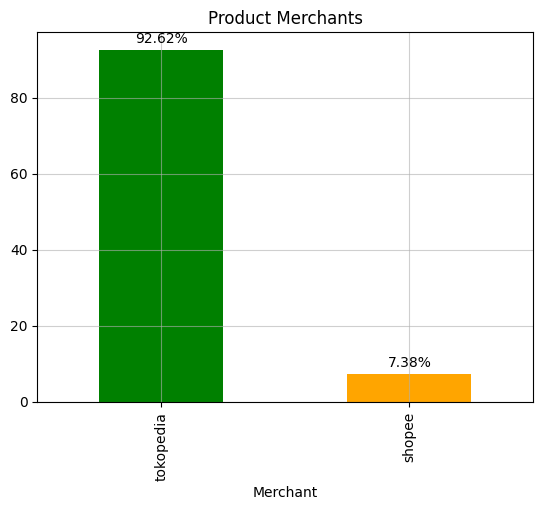

In [80]:
ax = df['Merchant'].value_counts(normalize=True).mul(100).plot(kind='bar', color=['green', 'orange'])
ax.bar_label(ax.containers[0], fmt='%.2f%%', padding=3)
ax.grid(True, alpha=0.6)
ax.set_title("Product Merchants")

#### Product Conditions

Text(0.5, 1.0, 'Product Conditions')

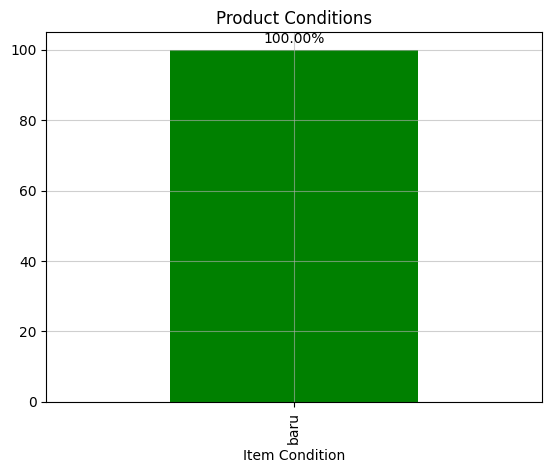

In [81]:
ax = df['Item Condition'].value_counts(normalize=True).mul(100).plot(kind='bar', color=['green', 'red'])
ax.bar_label(ax.containers[0], fmt='%.2f%%', padding=3)
ax.grid(True, alpha=0.6)
ax.set_title("Product Conditions")

### C.2 Bivariate Analysis

#### Date Selling Prices & Discrepancies

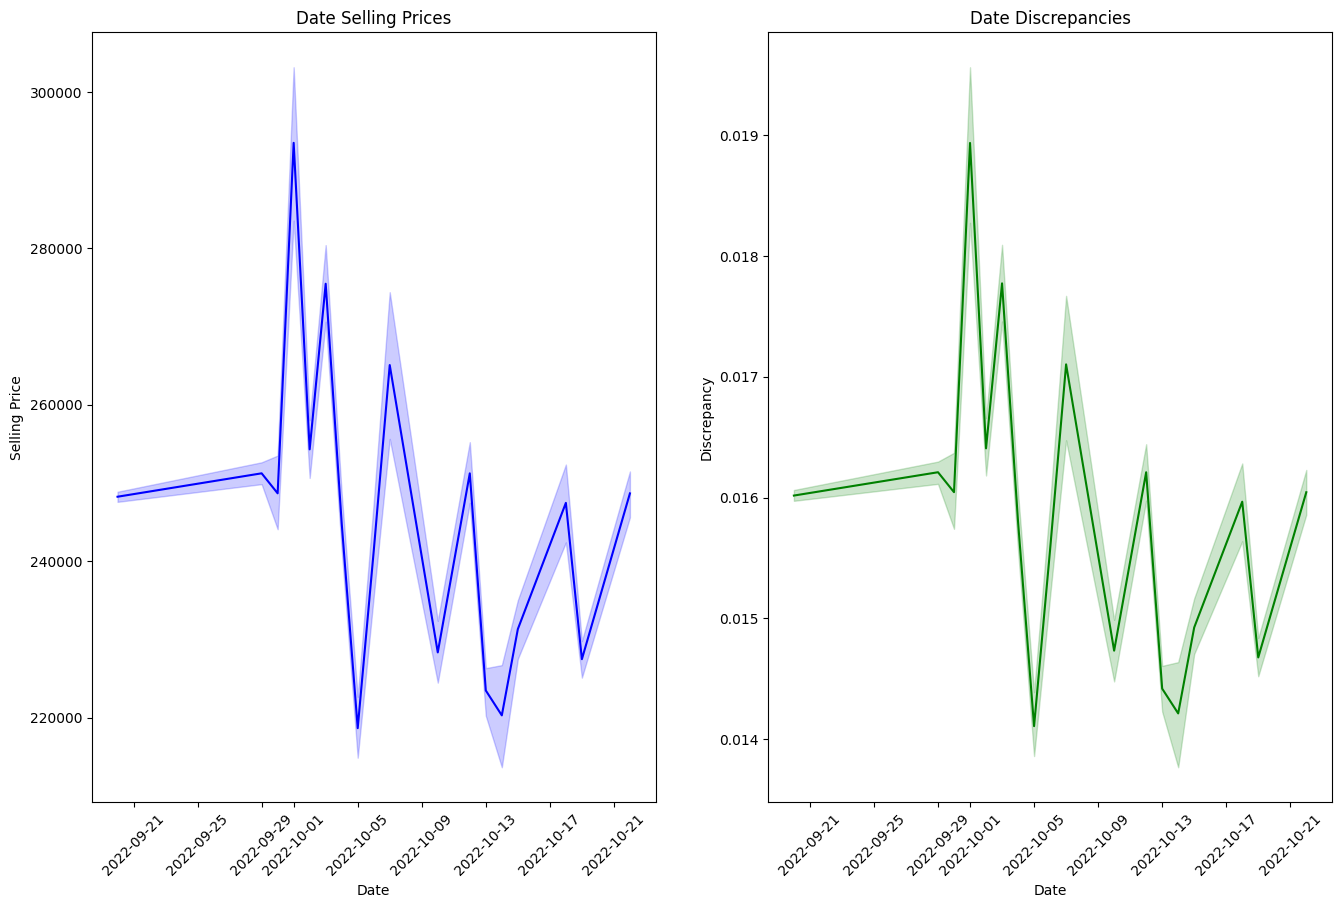

In [82]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.lineplot(df, x='Date', y='Selling Price', ax=axes[0], color='blue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title("Date Selling Prices")

sns.lineplot(df, x='Date', y='Discrepancy', ax=axes[1], color='green')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Date Discrepancies")

plt.show()

#### Week Selling Prices & Discrepancies

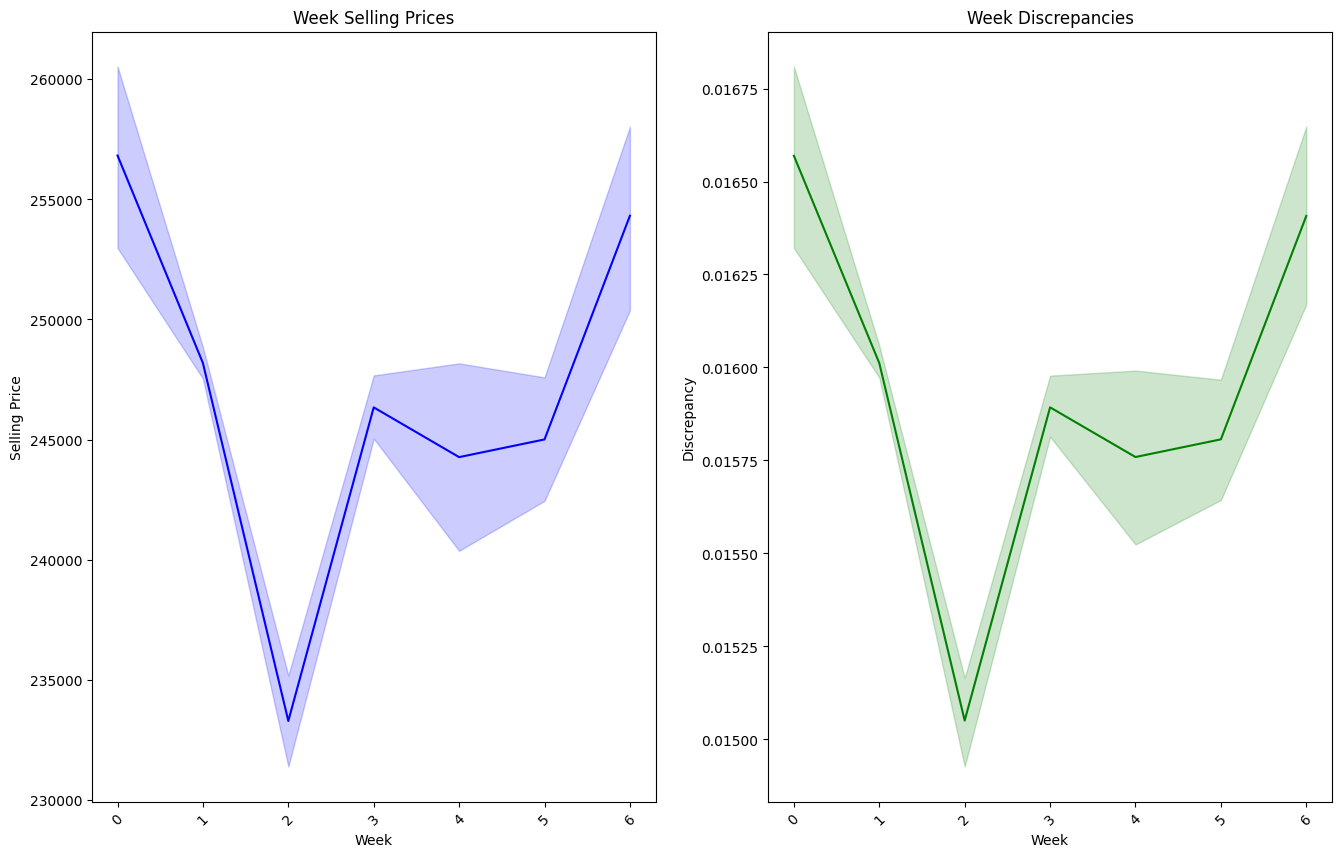

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
sns.lineplot(df, x='Week', y='Selling Price', ax=axes[0], color='blue')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title("Week Selling Prices")

sns.lineplot(df, x='Week', y='Discrepancy', ax=axes[1], color='green')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title("Week Discrepancies")

plt.show()

#### Discrepancy VS Selling Price

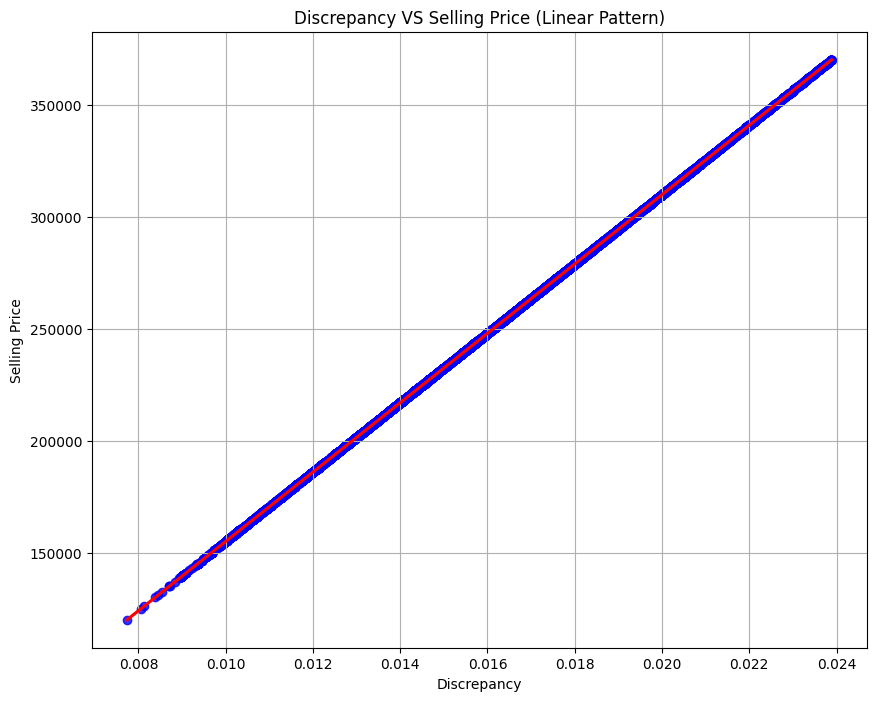

In [84]:
plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='Discrepancy', y='Selling Price', color='blue', line_kws={'color' : 'red'}, order=1)
plt.title("Discrepancy VS Selling Price (Linear Pattern)")
plt.grid(True)
plt.show()

#### JointPlot (Discrepancy VS Selling Price)

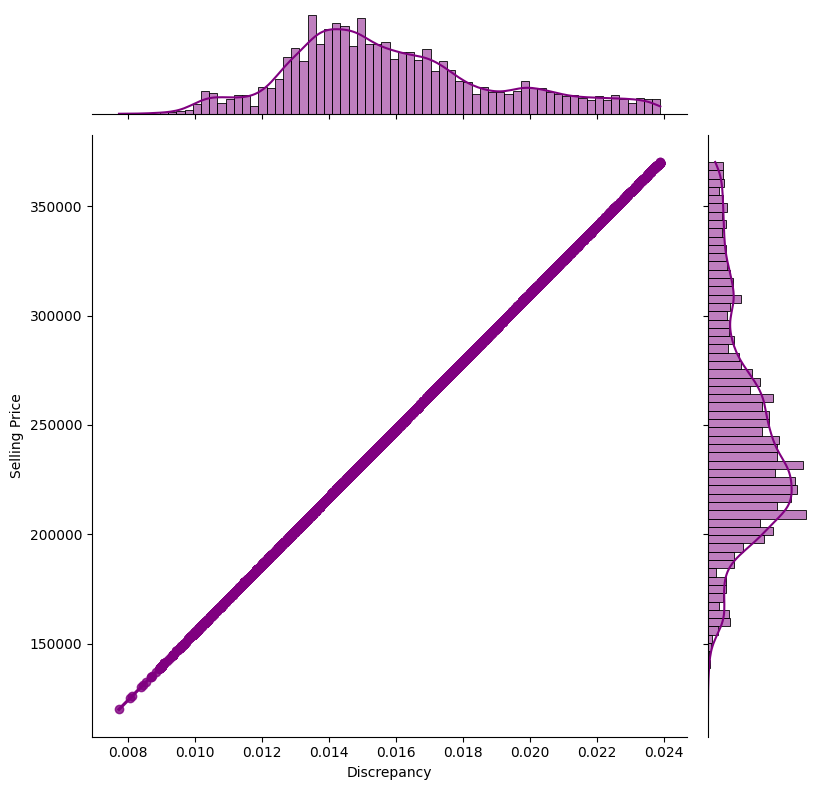

In [85]:
sns.jointplot(data=df, x='Discrepancy', y='Selling Price', kind='reg', color='purple', height=8)
plt.show()

### C.3 Multivariate Analysis

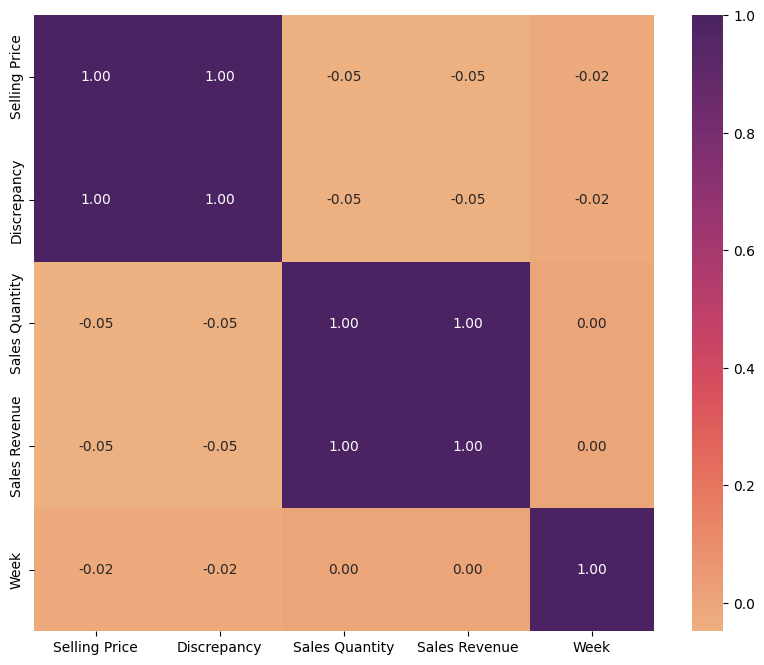

In [86]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='flare', fmt='.2f')
plt.show()

## D. Modelling

### D.1 Defining Feature (X) and Target (y) Variables

In [87]:
X_data = df[['Discrepancy']]
y_data = df['Selling Price']

### D.2 Splitting Train Data and Test Data (80 : 20)

In [88]:
np.random.seed(42)
indices = np.random.permutation(len(X_data))

test_size = int(len(X_data) * 0.2)

train_idx = indices[test_size:]
test_idx = indices[:test_size]

X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

### D.3 Feature Scaling

#### Min-Max Scaling (Normalization) for Continous Data

In [89]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# sns.boxplot(X_train, ax=axes[0])
# axes[0].set_title("Feature Before Min-Max Scaling")

# sns.boxenplot(X_train, ax=axes[1])
# axes[1].set_title("Feature Before Min-Max Scaling")

# plt.tight_layout()
# plt.show()

In [90]:
# X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

In [91]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 8))

# sns.boxplot(X_train, ax=axes[0])
# axes[0].set_title("Feature After Min-Max Scaling")

# sns.boxenplot(X_train, ax=axes[1])
# axes[1].set_title("Feature After Min-Max Scaling")

# plt.tight_layout()
# plt.show()

### D.4 Matrix Modification (Add Bias)

In [92]:
ones_train = np.ones((len(X_train), 1))
ones_test = np.ones((len(X_test), 1))


X_train = np.concatenate((ones_train, X_train), axis=1)
X_test = np.concatenate((ones_test, X_test), axis=1)

### D.5 Calculate Theta (OLS Normal Equation)

In [93]:
theta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

test_prediction = X_test @ theta
train_prediction = X_train @ theta

In [94]:
theta.shape

(2,)

### D.6 Modelling Results

In [95]:
intercept = theta[0]
slope = theta[1]

print("-" * 40)
print("   MODELLING RESULTS (SIMPLE LINEAR)")
print("-" * 40)

print(f"Intercept (Starting Price): {intercept:.2f}")
print(f"Slope (Discrepancy): {slope:.2f}")
print(f"Selling Price Formula: y = ({slope:.2f} * Discrepancy) + {intercept:.2f}")

----------------------------------------
   MODELLING RESULTS (SIMPLE LINEAR)
----------------------------------------
Intercept (Starting Price): 0.00
Slope (Discrepancy): 15500000.00
Selling Price Formula: y = (15500000.00 * Discrepancy) + 0.00


## E. Evaluation

### E.1 Calculate MSE (Mean Squared Error)

#### Test & Train Error

In [97]:
error_test = y_test - test_prediction
error_train = y_train - train_prediction

#### Test MSE

In [98]:
test_mse = np.mean(error_test ** 2)
print(f"MSE (Test): {test_mse:.2f}")

MSE (Test): 0.00


#### Train MSE

In [99]:
train_mse = np.mean(error_train ** 2)
print(f"MSE (Train): {train_mse:.2f}")

MSE (Train): 0.00


### E.2 Calculate MAE (Mean Absolute Error)

#### Test MAE

In [100]:
test_mae = np.mean(np.abs(error_test))
print(f"MAE (Test): {test_mae:.2f}")

MAE (Test): 0.00


#### Train MAE

In [101]:
train_mae = np.mean(np.abs(error_train))
print(f"MAE (Train): {train_mae:.2f}")

MAE (Train): 0.00


### E.3 Calculate RMSE (Root Mean Squared Error)

#### Test RMSE

In [102]:
test_rmse = np.sqrt(test_mse)
print(f"RMSE (Test): {test_rmse:.2f}")

RMSE (Test): 0.00


#### Train RMSE

In [103]:
train_rmse = np.sqrt(train_mse)
print(f"RMSE (Train): {train_rmse:.2f}")

RMSE (Train): 0.00


### E.4 Calculate R-Squared / R2-Score (Accuracy)

#### Test R2-Score

In [104]:
test_ss_residual = np.sum(error_test ** 2)
test_ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
test_r2_score = 1 - test_ss_residual / test_ss_total
print(f"R2-Score (Test): {test_r2_score:.2f}")

R2-Score (Test): 1.00


#### Train R2-Score

In [105]:
train_ss_residual = np.sum(error_train ** 2)
train_ss_total = np.sum((y_train - np.mean(y_train)) ** 2)
train_r2_score = 1 - train_ss_residual / train_ss_total
print(f"R2-Score (Train): {train_r2_score:.2f}")

R2-Score (Train): 1.00


### E.5 Calculate Adjusted R-Squared / R2-Score (Accuracy)

#### Test Adjusted R2-Score

In [108]:
test_n = len(y_test)
test_p = X_test.shape[1] - 1

test_adj_r2_score = 1 - ((1 - test_r2_score) * (test_n - 1) / (test_n - test_p - 1))
print(f"Adjusted R2-Score (Test): {test_adj_r2_score:.2f}")

Adjusted R2-Score (Test): 1.00


#### Train Adjusted R2-Score

In [109]:
train_n = len(y_train)
train_p = X_train.shape[1] - 1

train_adj_r2_score = 1 - ((1 - train_r2_score) * (train_n - 1) / (train_n - train_p - 1))
print(f"Adjusted R2-Score (Train): {train_adj_r2_score:.2f}")

Adjusted R2-Score (Train): 1.00


### E.6 Residuals VS Predictions

Text(0.5, 1.0, 'Residuals Normality (Must Resemble a Bell)')

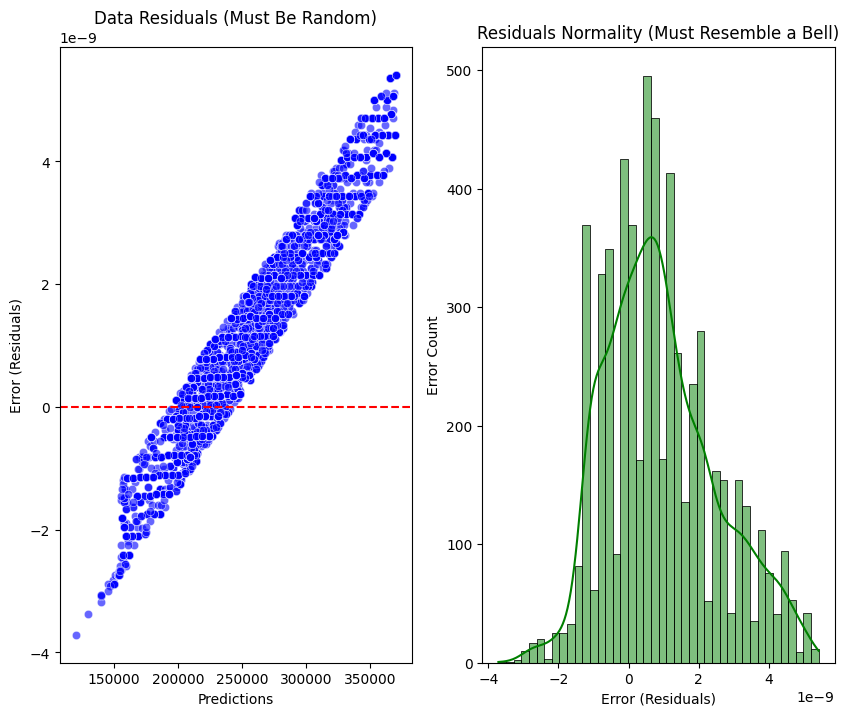

In [110]:
residuals = y_test - test_prediction

fig, axes = plt.subplots(1, 2, figsize=(10, 8))
sns.scatterplot(x=test_prediction, y=residuals, ax=axes[0], alpha=0.6, color='blue')
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_xlabel("Predictions")
axes[0].set_ylabel("Error (Residuals)")
axes[0].set_title("Data Residuals (Must Be Random)")

sns.histplot(residuals, ax=axes[1], kde=True, color='green')
axes[1].set_xlabel("Error (Residuals)")
axes[1].set_ylabel("Error Count")
axes[1].set_title("Residuals Normality (Must Resemble a Bell)")

### E.7 Model Evalutaion (Visual)

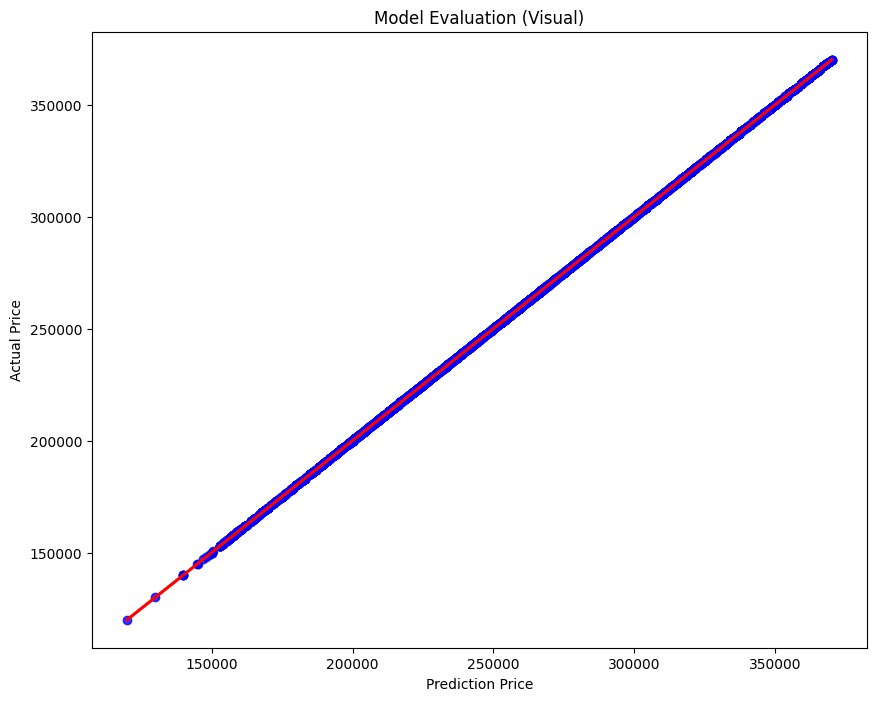

In [112]:
plt.figure(figsize=(10,8))
sns.regplot(x=test_prediction, y=y_test, color='blue', line_kws={'color' : 'red'}, order=1)
plt.xlabel("Prediction Price")
plt.ylabel("Actual Price")
plt.title("Model Evaluation (Visual)")
plt.show()

## F. GUI

### F.1 New Data Prediction Formula

In [ ]:
intercept = theta[0]
slope = theta[1]

print("-" * 40)
print("   MODELLING RESULTS (SIMPLE LINEAR)")
print("-" * 40)

print(f"Intercept (Starting Price): {intercept:.2f}")
print(f"Slope (Discrepancy): {slope:.2f}")
print(f"Selling Price Formula: y = ({slope:.2f} * Discrepancy) + {intercept:.2f}")

### F.2 Tkinter

In [183]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox

intercept = theta[0]
slope = theta[1]

def predict():
    raw_input = Input_Discrepancy.get() 
    if not raw_input:
            messagebox.showwarning("Peringatan", "Mohon isi nilai Discrepancy terlebih dahulu!")
            return
    input_user = float(raw_input)
    price = (slope * input_user) + intercept
    price_format = f"Rp {price:,.0f}".replace(',', '.')
    Result.config(text=price_format, fg="#00fb60")
    
    
 
root = tk.Tk()
root.title("Simple Linear Regression")
root.geometry("400x500")
root.config(bg="#345e88")

Header = Frame(root, bg="#34495e")
Header.pack(fill=X)
Title = Label(Header, text="TP - Link Price Prediction", fg="#FFFFFF", bg="#34495e",font=('Segoe UI', 18, 'bold'))
Title.pack(pady=(10, 5))
Description = Label(Header, text="TLWR80N", fg="#FFFFFF", bg="#34495e",font=('Segoe UI', 10, 'bold'))
Description.pack(pady=(0, 15))

Main = Frame(root, bg="#345e88")
Main.pack(fill=X)
InputLabel = Label(Main, text="Input Discrepancy", fg="#e7f3ff", bg="#345e88",font=('Segoe UI', 14, 'bold'))
InputLabel.pack(pady=(20, 5))
Input_Discrepancy = Entry(Main, font=('Segoe UI', 14), justify="center")
Input_Discrepancy.pack(pady=(10))
ButtonDiscrepancy = Button(Main, text="Predict", fg="#e7f3ff", bg="#34495e", font=('Segoe UI', 12, 'bold'), command=predict, padx=70)
ButtonDiscrepancy.pack(pady=10)
Result = Label(Main, text="-", fg="#e7f3ff", bg="#345e88",font=('Segoe UI', 14, 'bold'))
Result.pack(pady=10)

root.mainloop()